In [1]:
import pandas as pd
import numpy as np
# Libraries for Text Preprocessing
import re
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
# Libraries for Model
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Embedding, LSTM, SpatialDropout1D
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [26]:
data_set = pd.read_csv('./data_training/dataset_6.csv')
data_set.head()

,text,aspek,sentiment,hotel,lokasi,kamar,pelayanan,makanan,harga
0,shuttle gratis malioboro,harga,positive,0,0,0,0,0,1
1,dapat gratis course golf,harga,positive,0,0,0,0,0,1
2,gratis andong keliling,harga,positive,0,0,0,0,0,1
3,sesuai harga,harga,positive,0,0,0,0,0,1
4,harga terjangkau,harga,positive,0,0,0,0,0,1


In [25]:
tokenizer=Tokenizer(1500)
tokenizer.fit_on_texts(data_set["text"].values)
X=tokenizer.texts_to_sequences(data_set["text"].values)
X=pad_sequences(X, maxlen=31, padding='post')
vocab_size = len(tokenizer.word_index) + 1
data_set.head()
print(X)
# print(X.shape)
# print(vocab_size)

[[ 542   43  112 ...    0    0    0]
 [  42   43 1199 ...    0    0    0]
 [  43  970  618 ...    0    0    0]
 ...
 [ 537    7  156 ...    0    0    0]
 [   1    2  115 ...    0    0    0]
 [   9    1   17 ...    0    0    0]]


In [19]:
tokenize_text = pd.DataFrame({
    'original_text':data_set["text"],
    'tokenized_text':X[0]
})
tokenize_text.head(20)
# print(prediction_sentiment_result_convert)

ValueError: array length 31 does not match index length 5378

In [7]:
y=pd.get_dummies(data_set[["sentiment"]])

# switch values for data aspect makanan
new_column_order = ['sentiment_positive', 'sentiment_negative']
y = y[new_column_order]

# Split the data into training and testing sets
x_train,x_test,y_train,y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [13]:
import tensorflow as tf

model = Sequential()
model.add(Embedding(vocab_size, 32,input_length = 31))
model.add(SpatialDropout1D(0.8))
model.add(LSTM(64, dropout=0.4, recurrent_dropout=0.2))
model.add(Dense(2,activation='sigmoid'))
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc'])
history = model.fit(
    x_train,
    y_train,
    epochs=10,
    batch_size=32,
    validation_data=(x_test, y_test)
)

Epoch 1/10
135/135 [==============================] - 7s 36ms/step - loss: 0.6937 - acc: 0.4981 - val_loss: 0.6931 - val_acc: 0.5065
Epoch 2/10
135/135 [==============================] - 5s 37ms/step - loss: 0.6935 - acc: 0.5091 - val_loss: 0.6928 - val_acc: 0.5065
Epoch 3/10
135/135 [==============================] - 4s 30ms/step - loss: 0.6588 - acc: 0.5918 - val_loss: 0.6550 - val_acc: 0.5836
Epoch 4/10
135/135 [==============================] - 4s 30ms/step - loss: 0.6435 - acc: 0.6041 - val_loss: 0.5980 - val_acc: 0.6682
Epoch 5/10
135/135 [==============================] - 4s 30ms/step - loss: 0.6217 - acc: 0.6427 - val_loss: 0.5824 - val_acc: 0.6822
Epoch 6/10
135/135 [==============================] - 4s 29ms/step - loss: 0.5851 - acc: 0.6943 - val_loss: 0.6835 - val_acc: 0.5827
Epoch 7/10
135/135 [==============================] - 4s 30ms/step - loss: 0.6737 - acc: 0.5270 - val_loss: 0.6737 - val_acc: 0.5437
Epoch 8/10
135/135 [==============================] - 4s 30ms/step - 

In [158]:
# # Hotel yang nyaman, tempat tidur besar, toilet bersih, sarapan enak dan variasi makanan lumayan banyak. 
# review_test=['pelayanan sangat baik dan ramah pada pengunjung.']
review_test = ['kamar pengap tidak ada jendela yang memadai']
review_tok=tokenizer.texts_to_sequences(review_test)
review_pad=pad_sequences(review_tok,maxlen=31,padding='post')
prediction=model.predict(review_pad).flatten()

# Convert probabilities to binary class labels
threshold = 0.5
prediction = tf.nn.softmax(prediction)
prediction = tf.where(prediction < threshold, 0, 1)

print("prediction: ", prediction.numpy())

prediction:  [0 1]


In [140]:
model.save('sentiment_aspek.h5')

In [1]:
import neattext.functions as nfx

data_validation = pd.read_excel('validation_sentimen.xlsx')
data_validation.tail()

def cleaning(text):
    text = re.sub(r'\n',' ',text) # Hapus \n (enter)
    text = nfx.remove_hashtags(text) # Hapus hashtags
    text = nfx.remove_numbers(text) # Hapus number
    text = text.strip() # Hapus Whitespace
    text = re.sub('[^0-9a-zA-Z]+', ' ', text) # Hapus karakter selain alfabet dan angka
    return text

def casefolding(text):
    return text.lower()

data_validation['content_cleaned'] = data_validation['Text'].apply(cleaning).apply(casefolding)

data_validation.head()

NameError: name 'pd' is not defined

In [181]:
tokenizer.fit_on_texts(data_validation['content_cleaned'])
X=tokenizer.texts_to_sequences(data_validation['content_cleaned'])
X=pad_sequences(X, maxlen=31, padding='post')

threshold = 0.5
prediction_result = []

predictions_label = model.predict(X)
predictions_label = tf.where(predictions_label < threshold, 0, 1)

for result in predictions_label:
    prediction_result.append(result[0].numpy())

print(prediction_result)

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1]


       False  True
False     19     3
True      13    33


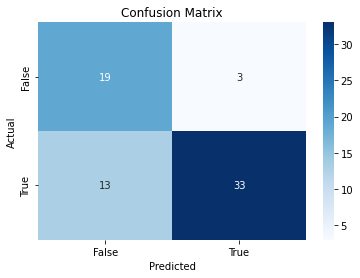

In [182]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

data = data_validation['Sentimen'].tolist()
sentiment_mapping = {'positive': 1, 'negative': 0}
actual_sentiment = [sentiment_mapping[sentiment] for sentiment in data]

# Membuat confusion matrix
confusion_mat = confusion_matrix(prediction_result, actual_sentiment)

confusion_df = pd.DataFrame(confusion_mat, index=['False', 'True'], columns=['False', 'True'])
print(confusion_df)

# Visualisasi confusion matrix
sns.heatmap(confusion_df, annot=True, cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [183]:
Accuracy = metrics.accuracy_score(actual_sentiment, prediction_result)
F1_score = metrics.f1_score(actual_sentiment, prediction_result)
print("Accuracy :", Accuracy)
print("F1_score :", F1_score)

Accuracy : 0.7647058823529411
F1_score : 0.8048780487804877


In [192]:
prediction_sentiment_result_convert = pd.DataFrame({
    'original_text':data_validation['text'],
    'text_cleaned':data_validation['content_cleaned'],
    'actual_sentiment': actual_sentiment,
    'predicted_sentiment': prediction_result
})
prediction_sentiment_result_convert.head(20)
# print(prediction_sentiment_result_convert)

,original_text,text_cleaned,actual_sentiment,predicted_sentiment
0,"Kamar yg bersih, fasilitas oke lokasi dekat dg...",kamar yg bersih fasilitas oke lokasi dekat dg ...,1,1
1,"Staffnya ramah dan sigap, untuk menu makanan j...",staffnya ramah dan sigap untuk menu makanan ju...,1,1
2,Super duper ramah all staff.nya. Hotelnya bers...,super duper ramah all staff nya hotelnya bersi...,1,1
3,Sarapan sahurnya juga enak banget rasanya. Lok...,sarapan sahurnya juga enak banget rasanya loka...,1,1
4,Lokasi hotel dekat dengan jalan raya dan ramai...,lokasi hotel dekat dengan jalan raya dan ramai...,1,1
5,Suka dengan keramahan para staffnya. Kamarnya ...,suka dengan keramahan para staffnya kamarnya j...,1,1
6,"Selalu suka nginep disini, kamar luas makanan ...",selalu suka nginep disini kamar luas makanan e...,1,1
7,"Hotelnya bagus terutama lokasinya sangat oke, ...",hotelnya bagus terutama lokasinya sangat oke b...,1,1
8,"Pelayanan oke banget, staff nya ramah, parkira...",pelayanan oke banget staff nya ramah parkiran ...,1,1
9,"Staf nya ramah2 dan sigap, kamar bersih, nyama...",staf nya ramah dan sigap kamar bersih nyaman k...,1,1


In [190]:
prediction_sentiment_result_convert.to_csv('result.csv', index=False)

In [20]:
test_list = [ 'kamar pengap tidak ada jendela yang memadai',
             'harga terlalu mahal tidak sesuai dengan pelayanan',
             'makanan di resto hotel begitu buruk dan tidak enak',
             'kamar mandi hotel ini buruk sekali',
             'pelayanan buruk, tidak ramah pada pengunjung',
             'pelayanan di resto kurang baik',
             'kamar yg bersih fasilitas oje lokasi dekat dg penjual makanan serta pelayanan yg ramah',
             'respon staff baik dan cepat',
             'pelayanan semua ramah dan bagus saya suka',
             'fasilitas hotel bagus yang sangat lengkap seperti bintang lima',
             'saya suka lokasi hotel strategis dekat banyak rumah makan',
             'kamarnya juga bersih dan nyaman',
             'makanan dan minuman untuk sarapan pagi bervariasi buat anak-anak suka',
             'makanan dan minuman sarapan pagi enak semua',
             'makanan di hotel ini lezat',
             'kamar mewah dengan balkon pemandangan kota',
             'harga terjangkau kualitas bintang lima, saya sangat suka',
            ]
# test_list = ['tidak suka kamar sempit']
text = test_list

tokenizer.fit_on_texts(text)
test_sequences = tokenizer.texts_to_sequences(text)
test_pad = pad_sequences(test_sequences, maxlen=31, padding='post')

print(test_pad)

[[   3  376    1    2  230  835  252    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0]
 [   5  165   37    1   33  980   11    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0]
 [   6  390   48    4  930  109  385    1   13    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0]
 [   3   20    4  742  109  617    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0]
 [  11  109    1   17  733  464    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0]
 [  11  390   48  151   16    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0]
 [   3  981   29   30 1649  

In [21]:
from keras.models import load_model

model_filenames = ['sentiment_aspek.h5']  # List of models
prediction_sentiments = []
threshold = 0.5

models = []
for filename in model_filenames:
    model = load_model(filename)
    models.append(model)

predictions = np.zeros((test_pad.shape[0], len(model_filenames)))

for i, model in enumerate(models):
    preds = model.predict(test_pad)
    preds_binary = np.where(preds > 0.5, 1, 0)
    for j, pred in enumerate(preds_binary):
        predictions[j][i] = pred[0]

prediction_result = predictions.flatten().astype(int)

print(prediction_result)

[0 0 1 1 0 1 1 1 1 1 0 1 1 1 1 1 0]


       False  True
False      3     2
True       2    10


<AxesSubplot:>

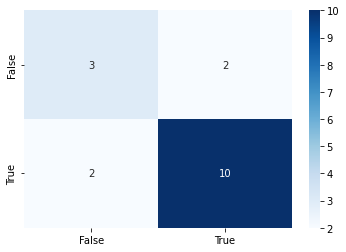

In [22]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Nilai prediksi dan actual dalam bentuk list of array
y_pred = prediction_result
y_actual = [0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]

# Membuat confusion matrix
confusion_mat = confusion_matrix(y_pred, y_actual)

confusion_df = pd.DataFrame(confusion_mat, index=['False', 'True'], columns=['False', 'True'])
print(confusion_df)

# Visualisasi confusion matrix
sns.heatmap(confusion_df, annot=True, cmap='Blues')

In [23]:
Accuracy = metrics.accuracy_score(y_actual, y_pred)
F1_score = metrics.f1_score(y_actual, y_pred)
print("Accuracy :", Accuracy)
print("F1_score :", F1_score)

Accuracy : 0.7647058823529411
F1_score : 0.8333333333333334
